In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
email_table = pd.read_csv("/content/email_table.csv")
opened_emails = pd.read_csv("/content/email_opened_table.csv")
link_clicked = pd.read_csv("/content/link_clicked_table.csv")

In [3]:
email_table['opened'] = email_table['email_id'].isin(opened_emails['email_id']).astype(int)
email_table['clicked'] = email_table['email_id'].isin(link_clicked['email_id']).astype(int)

In [4]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [5]:
email_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
 7   opened               100000 non-null  int64 
 8   clicked              100000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


In [6]:
email_table.isnull().sum()

,0
email_id,0
email_text,0
email_version,0
hour,0
weekday,0
user_country,0
user_past_purchases,0
opened,0
clicked,0


In [7]:
email_table.shape

(100000, 9)

In [8]:
total_emails = len(email_table)
total_opened = email_table['opened'].sum()
total_clicked = email_table['clicked'].sum()

In [9]:
print(f"Total emails: {total_emails}")
print(f"Total emails opened: {total_opened}")
print(f"Total emails clicked: {total_clicked}")

Total emails: 100000
Total emails opened: 10345
Total emails clicked: 2119


In [10]:
open_rate = (total_opened / total_emails) * 100
click_rate = (total_clicked / total_emails) * 100
ctr = (total_clicked / total_opened) * 100 # click through rate for impressions

In [11]:
print(f"Open rate: {open_rate:.2f}%")
print(f"Click rate: {click_rate:.2f}%")
print(f"CTR: {ctr:.2f}%")

Open rate: 10.35%
Click rate: 2.12%
CTR: 20.48%


In [12]:
text_analysis = email_table.groupby('email_text').agg({
    'opened': 'mean',
    'clicked': 'mean'
}).round(4) * 100
print("Performance by Email Text Length:")
print(text_analysis)

Performance by Email Text Length:
             opened  clicked
email_text                  
long_email     9.12     1.85
short_email   11.59     2.39


In [13]:
version_analysis = email_table.groupby('email_version').agg({
    'opened': 'mean',
    'clicked': 'mean'
}).round(4) * 100
print("Performance by Email Version:")
print(version_analysis)

Performance by Email Version:
               opened  clicked
email_version                 
generic          7.93     1.51
personalized    12.78     2.73


In [14]:
hour_analysis = email_table.groupby('hour').agg({
    'opened': 'mean',
    'clicked': 'mean'
}).round(4) * 100
print("Performance by Hour:")
print(hour_analysis)

Performance by Hour:
      opened  clicked
hour                 
1       8.84     1.81
2       8.79     1.63
3       8.46     1.95
4       8.82     1.62
5       8.21     1.80
6       9.03     1.71
7       9.01     1.83
8       8.85     1.89
9      12.57     2.58
10     13.24     2.82
11     12.66     2.71
12     12.45     2.57
13     10.91     1.99
14     10.94     2.07
15     10.54     2.49
16     10.47     2.32
17     10.94     1.85
18      9.43     1.62
19      7.51     1.66
20      8.84     1.22
21      5.75     0.82
22      6.37     1.96
23      8.28     4.14
24     15.94     2.90


In [15]:
weekday_analysis = email_table.groupby('weekday').agg({
    'opened': 'mean',
    'clicked': 'mean'
}).round(4) * 100
print("Performance by Weekday:")
print(weekday_analysis)

Performance by Weekday:
           opened  clicked
weekday                   
Friday       7.41     1.40
Monday      11.61     2.29
Saturday     8.77     1.78
Sunday       8.76     1.68
Thursday    11.84     2.44
Tuesday     12.05     2.49
Wednesday   12.03     2.76


In [16]:
country_analysis = email_table.groupby('user_country').agg({
    'opened': 'mean',
    'clicked': 'mean',
    'email_id': 'count'
}).round(4) * 100
country_analysis = country_analysis.rename(columns={'email_id': 'count'})
print("Top Countries by Click Rate:")
print(country_analysis.sort_values('clicked', ascending=False).head())

Top Countries by Click Rate:
              opened  clicked    count
user_country                          
UK             12.02     2.47  1993900
US             11.90     2.44  6009900
ES              3.91     0.83   996700
FR              4.06     0.80   999500


In [17]:
purchases_analysis = email_table.groupby('user_past_purchases').agg({
    'opened': 'mean',
    'clicked': 'mean',
    'email_id': 'count'
}).round(4) * 100
purchases_analysis = purchases_analysis.rename(columns={'email_id': 'count'})
print("\nPerformance by Past Purchases:")
print(purchases_analysis)


Performance by Past Purchases:
                     opened  clicked    count
user_past_purchases                          
0                      3.83     0.05  1387700
1                      9.28     1.12  1375100
2                     10.13     1.53  1303600
3                     10.81     1.66  1207700
4                     11.12     2.14  1074300
5                     11.63     2.22   904200
6                     12.34     3.21   751800
7                     12.30     3.07   605100
8                     13.95     3.96   439300
9                     13.47     4.55   329600
10                    13.92     4.66   236300
11                    15.07     5.60   155300
12                    14.19     6.57    94400
13                    14.01     6.57    57800
14                    19.61     9.12    36200
15                    19.68    11.70    18800
16                    21.57    11.76    10200
17                    18.33     8.33     6000
18                    20.00     2.86     3500
19

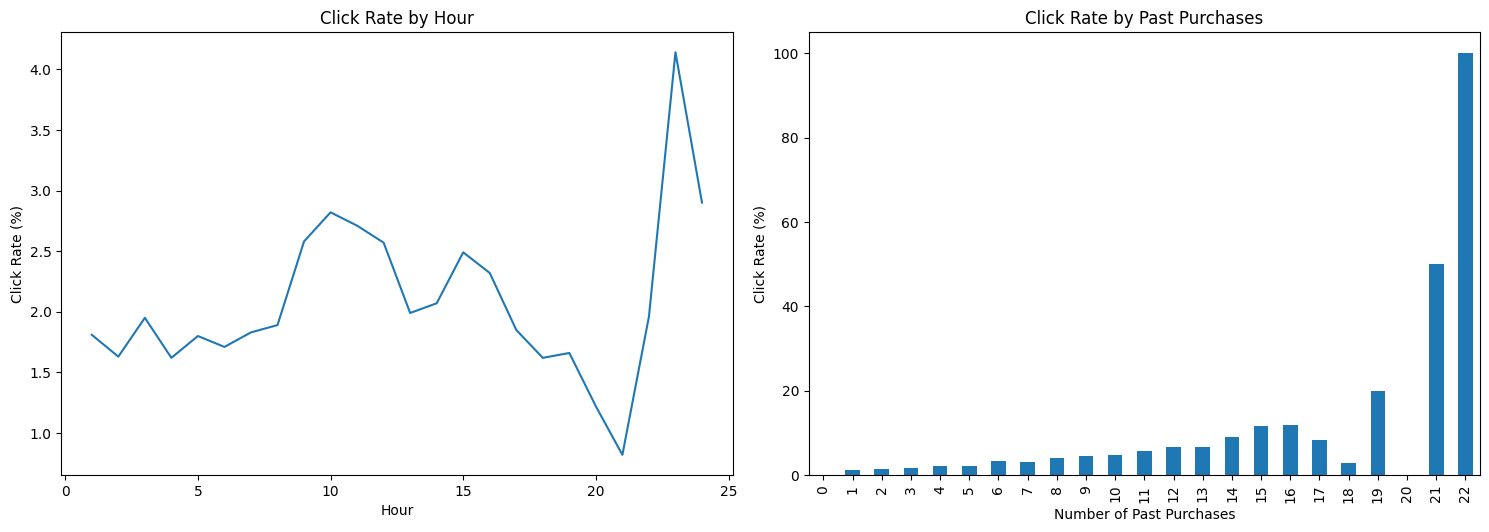

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
hour_analysis['clicked'].plot(kind='line')
plt.title('Click Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Click Rate (%)')

plt.subplot(2, 2, 2)
purchases_analysis['clicked'].plot(kind='bar')
plt.title('Click Rate by Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('Click Rate (%)')

plt.tight_layout()
plt.show()
plt.close()

In [19]:
le = LabelEncoder()
email_table['email_version_encoded'] = le.fit_transform(email_table['email_version'])
email_table['email_text_encoded'] = le.fit_transform(email_table['email_text'])
email_table['weekday_encoded'] = le.fit_transform(email_table['weekday'])
email_table['user_country_encoded'] = le.fit_transform(email_table['user_country'])

In [20]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked,email_version_encoded,email_text_encoded,weekday_encoded,user_country_encoded
0,85120,short_email,personalized,2,Sunday,US,5,0,0,1,1,3,3
1,966622,long_email,personalized,12,Sunday,UK,2,1,1,1,0,3,2
2,777221,long_email,personalized,11,Wednesday,US,2,0,0,1,0,6,3
3,493711,short_email,generic,6,Monday,UK,1,0,0,0,1,1,2
4,106887,long_email,generic,14,Monday,US,6,0,0,0,0,1,3


In [21]:
features = ['email_version_encoded', 'email_text_encoded', 'hour',
           'weekday_encoded', 'user_country_encoded', 'user_past_purchases']
X = email_table[features]
y = email_table['clicked']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 6)
(20000, 6)
(80000,)
(20000,)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [25]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier(), SVC()]


In [26]:
best_score = 0
best_model = None
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", mt.accuracy_score(y_test, y_pred))
    print("Precision:", mt.precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", mt.recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", mt.f1_score(y_test, y_pred, average='weighted'))
    print("Score:", score)
    print()
    if score > best_score:
        best_score = score
        best_model = model
    print("Best model updated:", best_model)

LogisticRegression:
Accuracy: 0.97735
Precision: 0.9552130225000001
Recall: 0.97735
F1-score: 0.966154724757883
Score: 0.97735

Best model updated: LogisticRegression()
DecisionTreeClassifier:
Accuracy: 0.97235
Precision: 0.9563658300196536
Recall: 0.97235
F1-score: 0.9640475508366404
Score: 0.97235

Best model updated: LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier:
Accuracy: 0.97435
Precision: 0.9566659898065185
Recall: 0.97435
F1-score: 0.96499786236362
Score: 0.97435

Best model updated: LogisticRegression()
GradientBoostingClassifier:
Accuracy: 0.97735
Precision: 0.9552130225000001
Recall: 0.97735
F1-score: 0.966154724757883
Score: 0.97735

Best model updated: LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNeighborsClassifier:
Accuracy: 0.9772
Precision: 0.9597863665916478
Recall: 0.9772
F1-score: 0.9661780671659939
Score: 0.9772

Best model updated: LogisticRegression()
XGBClassifier:
Accuracy: 0.977
Precision: 0.9552052718451458
Recall: 0.977
F1-score: 0.9659797167425394
Score: 0.977

Best model updated: LogisticRegression()
SVC:
Accuracy: 0.97735
Precision: 0.9552130225000001
Recall: 0.97735
F1-score: 0.966154724757883
Score: 0.97735

Best model updated: LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
print("Best Model:", best_model.__class__.__name__, ", Best Score:", best_score)

Best Model: LogisticRegression , Best Score: 0.97735


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19547
           1       0.00      0.00      0.00       453

    accuracy                           0.98     20000
   macro avg       0.49      0.50      0.49     20000
weighted avg       0.96      0.98      0.97     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
baseline_ctr = email_table['clicked'].mean()
model_predicted_ctr = best_model.predict_proba(X)[:, 1].mean()
improvement = ((model_predicted_ctr - baseline_ctr) / baseline_ctr) * 100

In [30]:
print(f"Potential CTR Improvement: {improvement:.2f}%")

Potential CTR Improvement: -1.68%


# Feature Engineering


In [31]:
email_table['is_weekend'] = email_table['weekday_encoded'].isin([5, 6]).astype(int)
email_table['is_work_hour'] = email_table['hour'].between(9, 17).astype(int)
email_table['email_sent_bin'] = pd.cut(email_table['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])
email_table['email_sent_bin_encoded'] = email_table['email_sent_bin'].astype('category').cat.codes
email_table['version_text_combo'] = email_table['email_version_encoded'] * email_table['email_text_encoded']
email_table['user_engagement'] = email_table['user_past_purchases'] * email_table['opened']
country_ctr = email_table.groupby('user_country_encoded')['clicked'].mean()
email_table['country_ctr'] = email_table['user_country_encoded'].map(country_ctr)
email_table['purchase_bin'] = pd.cut(email_table['user_past_purchases'], bins=[-1, 0, 5, 20, 100], labels=['none', 'low', 'med', 'high'])
email_table['purchase_bin_encoded'] = email_table['purchase_bin'].astype('category').cat.codes

In [32]:
email_table.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'opened', 'clicked',
       'email_version_encoded', 'email_text_encoded', 'weekday_encoded',
       'user_country_encoded', 'is_weekend', 'is_work_hour', 'email_sent_bin',
       'email_sent_bin_encoded', 'version_text_combo', 'user_engagement',
       'country_ctr', 'purchase_bin', 'purchase_bin_encoded'],
      dtype='object')

In [33]:
features = [
    'email_version_encoded',
    'email_text_encoded',
    'hour',
    'weekday_encoded',
    'user_country_encoded',
    'user_past_purchases',
    'is_weekend',
    'is_work_hour',
    'email_sent_bin_encoded',
    'version_text_combo',
    'user_engagement',
    'country_ctr',
    'purchase_bin_encoded'
]
X = email_table[features]
y = email_table['clicked']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 13)
(20000, 13)
(80000,)
(20000,)


In [36]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier(), SVC()]


In [37]:
best_score = 0
best_model = None
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", mt.accuracy_score(y_test, y_pred))
    print("Precision:", mt.precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", mt.recall_score(y_test, y_pred, average='weighted'))
    print("F1-score:", mt.f1_score(y_test, y_pred, average='weighted'))
    print("Score:", score)
    print()
    if score > best_score:
        best_score = score
        best_model = model
    print("Best model updated:", best_model)

LogisticRegression:
Accuracy: 0.9771
Precision: 0.9656156552538372
Recall: 0.9771
F1-score: 0.9674135483223192
Score: 0.9771

Best model updated: LogisticRegression()
DecisionTreeClassifier:
Accuracy: 0.96935
Precision: 0.9659227599873249
Recall: 0.96935
F1-score: 0.9675504457157759
Score: 0.96935

Best model updated: LogisticRegression()
RandomForestClassifier:
Accuracy: 0.9715
Precision: 0.9649054275757563
Recall: 0.9715
F1-score: 0.9678370014036071
Score: 0.9715

Best model updated: LogisticRegression()
GradientBoostingClassifier:
Accuracy: 0.9769
Precision: 0.9646157541821938
Recall: 0.9769
F1-score: 0.9673021287445334
Score: 0.9769

Best model updated: LogisticRegression()
KNeighborsClassifier:
Accuracy: 0.97335
Precision: 0.9627845850462823
Recall: 0.97335
F1-score: 0.9671434530912784
Score: 0.97335

Best model updated: LogisticRegression()
XGBClassifier:
Accuracy: 0.97615
Precision: 0.9644254041164658
Recall: 0.97615
F1-score: 0.9679174397201054
Score: 0.97615

Best model update

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
print("Best Model:", best_model.__class__.__name__, ", Best Score:", best_score)

Best Model: SVC , Best Score: 0.97735


In [39]:
# model = SVC(probability=True)
# model.fit(X_train, y_train)

In [40]:
# baseline_ctr = email_table['clicked'].mean()
# model_predicted_ctr = model.predict_proba(X)[:, 1].mean()
# improvement = ((model_predicted_ctr - baseline_ctr) / baseline_ctr) * 100

In [41]:
# print(f"Potential CTR Improvement: {improvement:.2f}%")

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf'],  
    'probability': [True]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_


baseline_ctr = email_table['clicked'].mean()
model_predicted_ctr = best_svc.predict_proba(X)[:, 1].mean()
improvement = ((model_predicted_ctr - baseline_ctr) / baseline_ctr) * 100
print(f"Tuned Model Potential CTR Improvement: {improvement:.2f}%")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Tuned Model Potential CTR Improvement: 2.89%
